# Haptocellular carcinoma Survial Prediction
welcome to the prototype model for predicting the survival of patients with hepatocellular carcinoma.


**in this prototype you will find :**
- implementation of 3 algorithms : Logistic Regression, KNN and Naiieve Bayes
- Data Preprocessing steps
- Testing metrics (Accuracy, Senstivity and Specificity)


**Our Goal is to achieve the highest accurate model in order to increase survival rates of the patients** 

## Importing the data 
lets see what our data is made of 

In [1]:
# turning warnings off and viewing the tables fully 
options(warn= -1)
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

# importing the dataset 
data_dirty <- read.csv("hcc-data.txt", na.strings = "?",col.names = c("Gender"
,"Symptoms"
,"Alcohol"
,"HBsAg"
,"HBeAg"
,"HBcAb"
,"HCVAb"
,"Cirrhosis"
,"Endemic"
,"Smoking"
,"Diabetes"
,"Obesity"
,"Hemochro"
,"AHT"
,"CRI"
,"HIV"
,"NASH"
,"Varices"
,"Spleno"
,"PHT"
,"PVT"
,"Metastasis"
,"Hallmark"
,"Age"
,"Grams_day"
,"Packs_year"
,"PS"
,"Encephalopathy"
,"Ascites"
,"INR"
,"AFP"
,"Hemoglobin"
,"MCV"
,"Leucocytes"
,"Platelets"
,"Albumin"
,"Total_Bil"
,"ALT"
,"AST"
,"GGT"
,"ALP"
,"TP"
,"Creatinine"
,"Nodule"
,"Major_Dim"
,"Dir_Bil"
,"Iron"
,"Sat"
,"Ferritin"
,"Class"))
data_dirty$Class <- as.factor(data_dirty$Class)

In [2]:
head(data_dirty)

Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,NA,0,0,0,0,1,1,NA,NA,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0,NA,0,1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,1.8,NA,NA,NA,NA,1
1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50,50,2,1,2,0.96,5.8,8.9,79.8,8.4,472,3.30,0.40,58,68,202,109,7.0,2.10,5,13.0,0.10,28,6,16,1
1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40,30,0,1,1,0.95,2440.0,13.4,97.1,9.0,279,3.70,0.40,16,64,94,174,8.1,1.11,2,15.7,0.20,NA,NA,NA,0
1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100,30,0,1,1,0.94,49.0,14.3,95.1,6.4,199,4.10,0.70,147,306,173,109,6.9,1.80,1,9.0,NA,59,15,22,1
1,0,1,0,NA,0,0,1,0,NA,0,1,0,0,0,0,0,1,1,1,0,0,1,75,NA,NA,1,1,2,1.58,110.0,13.4,91.5,5.4,85,3.40,3.50,91,122,242,396,5.6,0.90,1,10.0,1.40,53,22,111,0
1,0,0,0,NA,1,1,1,0,0,1,0,NA,0,0,0,0,0,0,0,0,0,1,49,0,0,0,1,1,1.40,138.9,10.4,102.0,3.2,42000,2.35,2.72,119,183,143,211,7.3,0.80,5,2.6,2.19,171,126,1452,0


In [3]:
summary(data_dirty)

     Gender          Symptoms         Alcohol           HBsAg       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.0000   Median :0.0000  
 Mean   :0.8049   Mean   :0.6438   Mean   :0.7378   Mean   :0.1088  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                  NA's   :18                        NA's   :17      
     HBeAg           HBcAb            HCVAb          Cirrhosis     
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.008   Mean   :0.2714   Mean   :0.2194   Mean   :0.9024  
 3rd Qu.:0.000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.000   Max.   :1.0000   Max.  

In [4]:
str(data_dirty)

'data.frame':	164 obs. of  50 variables:
 $ Gender        : int  0 1 1 1 1 1 1 1 1 1 ...
 $ Symptoms      : int  NA 0 1 1 0 0 1 1 1 0 ...
 $ Alcohol       : int  0 1 1 1 1 0 1 1 1 1 ...
 $ HBsAg         : int  0 1 0 1 0 0 0 0 0 0 ...
 $ HBeAg         : int  0 0 0 0 NA NA NA 0 0 0 ...
 $ HBcAb         : int  0 1 0 1 0 1 0 0 0 0 ...
 $ HCVAb         : int  1 0 0 0 0 1 0 0 0 1 ...
 $ Cirrhosis     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Endemic       : int  NA 0 0 0 0 0 0 0 0 NA ...
 $ Smoking       : int  NA 1 1 1 NA 0 1 1 0 NA ...
 $ Diabetes      : int  1 0 1 0 0 1 1 1 0 0 ...
 $ Obesity       : int  0 0 0 0 1 0 NA 0 0 0 ...
 $ Hemochro      : int  0 0 0 0 0 NA 0 0 1 0 ...
 $ AHT           : int  1 1 1 1 0 0 0 1 0 0 ...
 $ CRI           : int  0 1 0 1 0 0 0 0 0 0 ...
 $ HIV           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NASH          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Varices       : int  1 0 0 0 1 0 0 NA 0 NA ...
 $ Spleno        : int  0 0 0 0 1 0 1 1 1 1 ...
 $ PHT           : int  0 1 0 0 1 

In [5]:
sapply(data_dirty, function(x) sum(is.na(x)))

Gender       Symptoms        Alcohol          HBsAg          HBeAg 
             0             18              0             17             39 
         HBcAb          HCVAb      Cirrhosis        Endemic        Smoking 
            24              9              0             39             41 
      Diabetes        Obesity       Hemochro            AHT            CRI 
             3              9             23              3              2 
           HIV           NASH        Varices         Spleno            PHT 
            14             22             52             15             11 
           PVT     Metastasis       Hallmark            Age      Grams_day 
             3              4              2              0             48 
    Packs_year             PS Encephalopathy        Ascites            INR 
            53              0              1              2              4 
           AFP     Hemoglobin            MCV     Leucocytes      Platelets 
             8              3              3              3              3 
       Albumin      Total_Bil            ALT            AST            GGT 
             6              5              4              3              3 
           ALP             TP     Creatinine         Nodule      Major_Dim 
             3             11              7              2             20 
       Dir_Bil           Iron            Sat       Ferritin          Class 
            44             78             79             79              0

**from the summary we deduce that:**
- there are high ratios of missing values 
- high sparsity between values of the featuers 

## Preprocessing the Data

### Data Imputation
**the first step in our preprocessing stage**

we used mice package for prediction of the missing vales 

In [6]:
library("mice")

Loading required package: lattice

Attaching package: ‘mice’

The following objects are masked from ‘package:base’:

    cbind, rbind



#### most of our features are an important predictors so we will use them in imputing the missing 
let\`s split the data first to categorical and nominal values

**from looking into the data set here are the categorical featres** 
"Gender"
,"Symptoms"
,"Alcohol"
,"HBsAg"
,"HBeAg"
,"HBcAb"
,"HCVAb"
,"Cirrhosis"
,"Endemic"
,"Smoking"
,"Diabetes"
,"Obesity"
,"Hemochro"
,"AHT"
,"CRI"
,"HIV"
,"NASH"
,"Varices"
,"Spleno"
,"PHT"
,"PVT"
,"Metastasis"
,"Hallmark"
,"PS"
,"Encephalopathy"
,"Ascites"

**the nominal features are the rest** 

In [7]:
# initializing the object with zero iterations 
# setting the methods for both categorical and numerical features 
init = mice(data_dirty, maxit=0) 
meth = init$method

**we used Predictive Mean Matching Method for both for now**

using different methods is still under testing for future stages of our prototype 

In [8]:
# importing categorical features 
meth[c("Gender"
,"Symptoms"
,"Alcohol"
,"HBsAg"
,"HBeAg"
,"HBcAb"
,"HCVAb"
,"Cirrhosis"
,"Endemic"
,"Smoking"
,"Diabetes"
,"Obesity"
,"Hemochro"
,"AHT"
,"CRI"
,"HIV"
,"NASH"
,"Varices"
,"Spleno"
,"PHT"
,"PVT"
,"Metastasis"
,"Hallmark"
,"PS"
,"Encephalopathy"
,"Ascites")] = "rf"

# importing numerical features 
meth[c("Age"
,"Grams_day"
,"Packs_year"
,"INR"
,"AFP"
,"Hemoglobin"
,"MCV"
,"Leucocytes"
,"Platelets"
,"Albumin"
,"Total_Bil"
,"ALT"
,"AST"
,"GGT"
,"ALP"
,"TP"
,"Creatinine"
,"Nodule"
,"Major_Dim"
,"Dir_Bil"
,"Iron"
,"Sat"
,"Ferritin")] = "mean"

# # restricting the imputation of class 
# meth[c("Class")] = ""

In [9]:
imputed <- mice(data_dirty, method = meth)


 iter imp variable
  1   1  Symptoms  HBsAg  HBeAg  HBcAb  HCVAb  Endemic  Smoking  Diabetes  Obesity  Hemochro  AHT  CRI  HIV  NASH  Varices  Spleno  PHT  PVT  Metastasis  Hallmark  Grams_day  Packs_year  Encephalopathy  Ascites  INR  AFP  Hemoglobin  MCV  Leucocytes  Platelets  Albumin  Total_Bil  ALT  AST  GGT  ALP  TP  Creatinine  Nodule  Major_Dim  Dir_Bil  Iron  Sat  Ferritin
  1   2  Symptoms  HBsAg  HBeAg  HBcAb  HCVAb  Endemic  Smoking  Diabetes  Obesity  Hemochro  AHT  CRI  HIV  NASH  Varices  Spleno  PHT  PVT  Metastasis  Hallmark  Grams_day  Packs_year  Encephalopathy  Ascites  INR  AFP  Hemoglobin  MCV  Leucocytes  Platelets  Albumin  Total_Bil  ALT  AST  GGT  ALP  TP  Creatinine  Nodule  Major_Dim  Dir_Bil  Iron  Sat  Ferritin
  1   3  Symptoms  HBsAg  HBeAg  HBcAb  HCVAb  Endemic  Smoking  Diabetes  Obesity  Hemochro  AHT  CRI  HIV  NASH  Varices  Spleno  PHT  PVT  Metastasis  Hallmark  Grams_day  Packs_year  Encephalopathy  Ascites  INR  AFP  Hemoglobin  MCV  Leucocyte

In [10]:
data_imputed <- complete(imputed)

In [11]:
sapply(data_imputed, function(x) sum(is.na(x)))

Gender       Symptoms        Alcohol          HBsAg          HBeAg 
             0              0              0              0              0 
         HBcAb          HCVAb      Cirrhosis        Endemic        Smoking 
             0              0              0              0              0 
      Diabetes        Obesity       Hemochro            AHT            CRI 
             0              0              0              0              0 
           HIV           NASH        Varices         Spleno            PHT 
             0              0              0              0              0 
           PVT     Metastasis       Hallmark            Age      Grams_day 
             0              0              0              0              0 
    Packs_year             PS Encephalopathy        Ascites            INR 
             0              0              0              0              0 
           AFP     Hemoglobin            MCV     Leucocytes      Platelets 
             0              0              0              0              0 
       Albumin      Total_Bil            ALT            AST            GGT 
             0              0              0              0              0 
           ALP             TP     Creatinine         Nodule      Major_Dim 
             0              0              0              0              0 
       Dir_Bil           Iron            Sat       Ferritin          Class 
             0              0              0              0              0

**now that the data is imputed let\`s check the summary to make sure nothing is wrong**

In [12]:
summary(data_imputed)

     Gender          Symptoms        Alcohol           HBsAg       
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.000   Median :1.0000   Median :0.0000  
 Mean   :0.8049   Mean   :0.628   Mean   :0.7378   Mean   :0.1037  
 3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
     HBeAg              HBcAb            HCVAb          Cirrhosis     
 Min.   :0.000000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.000000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.006098   Mean   :0.2439   Mean   :0.2195   Mean   :0.9024  
 3rd Qu.:0.000000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.000000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    Endemic           Smoki

# Training the data
### with our data free of missing values we can proceed into the training 
**we loaded the class feature as a factor for prediction**

In [13]:
data_imputed$Class <- make.names(data_imputed$Class)
data_imputed$Class <- as.factor(data_imputed$Class) # needed for algorithms below
levels(data_imputed$Class)

[1] "X0" "X1"

**we split the data with ratio 0.8 for training** 

In [14]:
# splitting the data
library(caret)

set.seed(123)
trainIndex = createDataPartition(y = data_imputed$Class, p=0.80, list=FALSE, times=1)

x_train <- data_imputed[trainIndex, ]
x_test  <- data_imputed[-trainIndex, ]

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [15]:
nrow(x_train)
nrow(x_test)

[1] 132

[1] 32

# Logistic Regression

## using GLMnet for prediction
**we used trainControl Cross-validation function with 10 folds and 3 repeates with the calculation of class probabilites 
and a summary function that computes the required metrics**

**for more illustration here\`s the equation used in the glmnet algorithm which shows percisely the parameters tuned in the search** 

**as $\alpha$ is the mixing ratio between L2 and L1 regularizations** 
**and $\lambda$ is the penality for the regularization**

**using Preproc center and scaling for standardization of the values where we noted that inputs have high sparsity of values which would affect a distance model like Logisitc regression and KNN**


$ \min_{(\beta_0, \beta) \in \mathbb{R}^{p+1}} -\left[\frac{1}{N} \sum_{i=1}^N y_i \cdot (\beta_0 + x_i^T \beta) - \log (1+e^{(\beta_0+x_i^T \beta)})\right] + \lambda \big[ (1-\alpha)||\beta||_2^2/2 + \alpha||\beta||_1\big]$


In [48]:
# cross validator 
ctrl <- trainControl(
  method = "repeatedcv",
  repeats = 3, 
  classProbs = TRUE, 
  summaryFunction = twoClassSummary  
)

#setting seed to prevent randomness 
set.seed(123)

# the model training 
glmFit <- train(
  Class ~ .,
  data = x_train,
  method = "glmnet",
  preProc = c("center", "scale"),
  tuneLength = 20,
  trControl = ctrl,
  metric = "Acccuracy"
)

In [49]:
glmFit$bestTune

,alpha,lambda
194,0.5263158,0.01744674


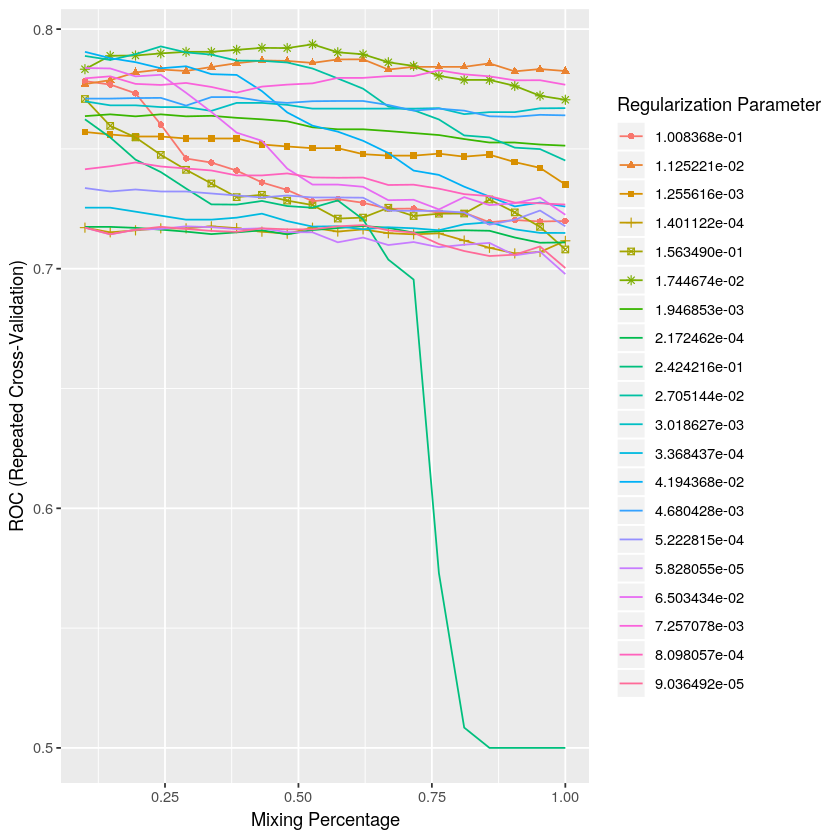

In [50]:
ggplot(glmFit)

In [51]:
glmClasses <- predict(glmFit, newdata = x_test)
str(glmClasses)

 Factor w/ 2 levels "X0","X1": 2 2 2 1 1 2 2 1 1 2 ...


In [52]:
confusionMatrix(data = glmClasses, x_test$Class)
# levels(x_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction X0 X1
        X0  9  5
        X1  3 15
                                         
               Accuracy : 0.75           
                 95% CI : (0.566, 0.8854)
    No Information Rate : 0.625          
    P-Value [Acc > NIR] : 0.09838        
                                         
                  Kappa : 0.4839         
                                         
 Mcnemar's Test P-Value : 0.72367        
                                         
            Sensitivity : 0.7500         
            Specificity : 0.7500         
         Pos Pred Value : 0.6429         
         Neg Pred Value : 0.8333         
             Prevalence : 0.3750         
         Detection Rate : 0.2812         
   Detection Prevalence : 0.4375         
      Balanced Accuracy : 0.7500         
                                         
       'Positive' Class : X0             
                                         

# k-Nearest Neighbors 

![knns](https://miro.medium.com/max/613/0*AQeJZfMd1z-vx4iH.png "KNN")
**a brief representation for the knn algorithm as shown the main parameter of this algorithm in K**

In [41]:
set.seed(123)

# Model
knnFit <- train(
  Class ~ .,
  data = x_train,
  method = "knn",
  preProc = c("center", "scale"),
  tuneLength = 60,
  trControl = ctrl,
  metric = "Accuracy")

knnFit$bestTune

,k
27,57


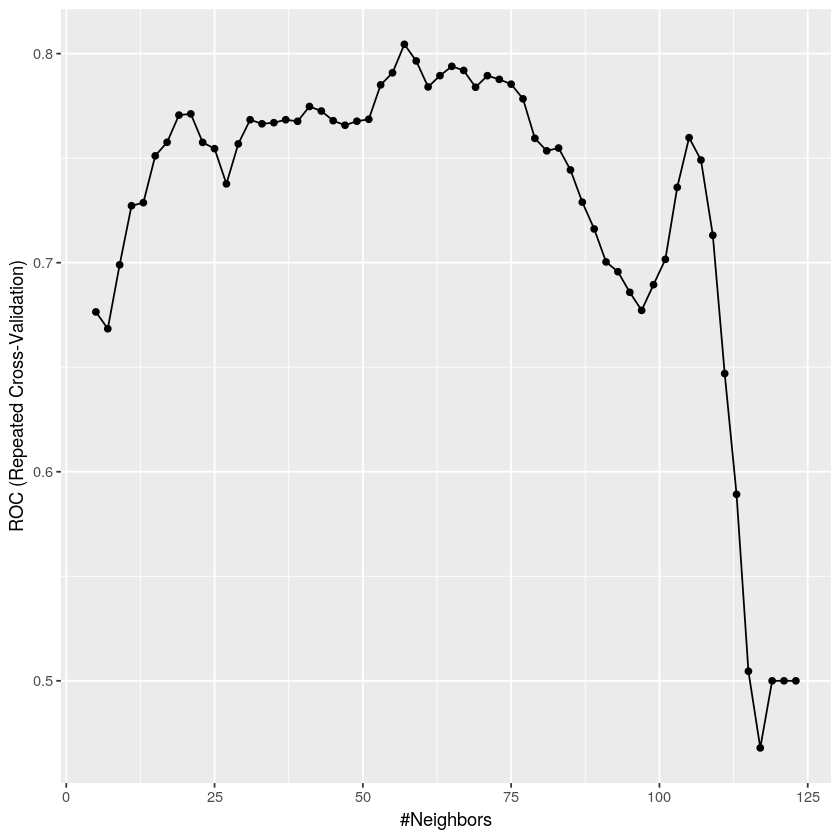

In [42]:
ggplot(knnFit)

In [43]:
knnPredict <- predict(knnFit,newdata = x_test)
confusionMatrix(knnPredict, x_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction X0 X1
        X0  0  0
        X1 12 20
                                         
               Accuracy : 0.625          
                 95% CI : (0.4369, 0.789)
    No Information Rate : 0.625          
    P-Value [Acc > NIR] : 0.578080       
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : 0.001496       
                                         
            Sensitivity : 0.000          
            Specificity : 1.000          
         Pos Pred Value :   NaN          
         Neg Pred Value : 0.625          
             Prevalence : 0.375          
         Detection Rate : 0.000          
   Detection Prevalence : 0.000          
      Balanced Accuracy : 0.500          
                                         
       'Positive' Class : X0             
                                         

# Naiieve Bayes

![nb](https://www.saedsayad.com/images/Bayes_rule.png "NB")

**a Brief representation of the Naive Bayes algorithms which mainly depends on Bayes Rule**

In [46]:
set.seed(123)

# Model
nbFit <- train(
  Class ~ .,
  data = x_train,
  method = "naive_bayes",
  preProc = c("center", "scale"),
  trControl = ctrl,
  metric = "Accuracy")

nbFit

Naive Bayes 

132 samples
 49 predictor
  2 classes: 'X0', 'X1' 

Pre-processing: centered (49), scaled (49) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 118, 118, 119, 119, 119, 119, ... 
Resampling results across tuning parameters:

  usekernel  ROC        Sens       Spec     
  FALSE      0.7063735  0.3733333  0.8217593
   TRUE      0.6520216  0.2988889  0.7819444

Tuning parameter 'laplace' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
ROC was used to select the optimal model using the largest value.
The final values used for the model were laplace = 0, usekernel = FALSE
 and adjust = 1.

In [47]:
nbPredict <- predict(nbFit,newdata = x_test)
confusionMatrix(nbPredict, x_test$Class)

Confusion Matrix and Statistics

          Reference
Prediction X0 X1
        X0  5  3
        X1  7 17
                                          
               Accuracy : 0.6875          
                 95% CI : (0.4999, 0.8388)
    No Information Rate : 0.625           
    P-Value [Acc > NIR] : 0.2961          
                                          
                  Kappa : 0.2857          
                                          
 Mcnemar's Test P-Value : 0.3428          
                                          
            Sensitivity : 0.4167          
            Specificity : 0.8500          
         Pos Pred Value : 0.6250          
         Neg Pred Value : 0.7083          
             Prevalence : 0.3750          
         Detection Rate : 0.1562          
   Detection Prevalence : 0.2500          
      Balanced Accuracy : 0.6333          
                                          
       'Positive' Class : X0              
                                    

# Next Steps 
**Models accuracies are a bit decent but we aspire for more so these are the proposed steps that we will dol next**
- Exploratory Data Analysis : we want to know our data better and visualize how each feature affect the output 
- Feature Selection : as you noticed we used the 49 features in our predictions which is not effective 
- Prevent models from Overfitting or underfitting 